In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [41]:
df = pd.read_csv('/content/weight-height.csv - weight-height.csv.csv')

In [42]:
df1 = df.copy()
df2 = df.copy()

In [43]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [44]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

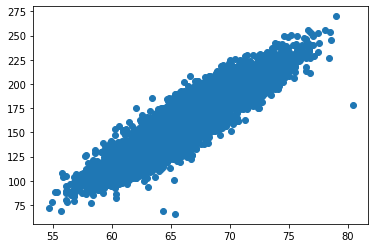

In [45]:
plt.scatter(df['Height'], df['Weight'])

In [46]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [47]:
le = LabelEncoder()

In [48]:

for col in df.columns:
  if is_numeric_dtype(df[col]):
    continue
  df[col] = le.fit_transform(df[col])


In [49]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [50]:
x = df.drop('Weight', axis='columns')

In [51]:
x

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [52]:
y = df['Weight']

In [53]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30, random_state=1)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [58]:
ypred = reg.predict(xtest)

In [59]:
ypred

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mae = mean_squared_error(ytest,ypred)

In [62]:
mae

99.67250998070033

In [36]:
from sklearn.metrics import mean_absolute_error

In [63]:
msa = mean_absolute_error(ytest, ypred)

In [64]:
msa

7.98213259272913

In [65]:
reg.score(xtest, ytest)

0.905995960709116

KNN Regresion 

In [66]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [69]:
for col in df1.columns:
  if is_numeric_dtype(df1[col]):
    continue
  df1[col] = le.fit_transform(df1[col])

In [70]:
df1

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [71]:
x = df1.drop('Weight', axis=1)
y = df1['Weight']

In [72]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,x,test_size=0.30, random_state=2)

In [73]:
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.neighbors import KNeighborsRegressor
neb = KNeighborsRegressor(n_neighbors=427)

In [74]:
neb.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=427)

In [77]:
neb.predict([[1,73.847017]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[ 1.        , 73.30179331]])

In [78]:
neb.score(xtest,ytest)

0.9340468733952143

In [79]:
y_pred = neb.predict(xtest)

In [80]:
y_pred

array([[ 0.29742389, 63.05959885],
       [ 0.63934426, 64.56738521],
       [ 1.        , 70.41645741],
       ...,
       [ 1.        , 73.6806599 ],
       [ 1.        , 66.29509663],
       [ 1.        , 69.20148023]])

In [81]:
mse = mean_absolute_error(ytest,y_pred)

In [82]:
mse

0.0929686537730316

In [83]:
mae = mean_squared_error(ytest,y_pred)

In [84]:
mae

0.09739094424724351

KNN Classifiter

In [85]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [87]:
for col in df2.columns:
  if is_numeric_dtype(df2[col]):
    continue
  df2[col] = le.fit_transform(df2[col])

In [88]:
df2

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [89]:
x = df2.drop('Gender', axis=1)
y = df2['Gender']

In [ ]:
from sklearn.model_selection